## Data Prep

**Import necessary modules and the ASOS/SNOTEL dataframes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime as dt
import seaborn as sns
pd.show_versions()
import sys
import graphviz
sys.executable
#import graphviz


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.5.final.0
python-bits: 32
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8
LOCALE: None.None

pandas: 0.24.0
pytest: None
pip: 18.1
setuptools: 39.0.1
Cython: None
numpy: 1.14.3
scipy: 1.1.0
pyarrow: None
xarray: None
IPython: 6.4.0
sphinx: None
patsy: 0.5.1
dateutil: 2.7.3
pytz: 2018.4
blosc: None
bottleneck: None
tables: None
numexpr: None
feather: None
matplotlib: 2.2.2
openpyxl: None
xlrd: 1.2.0
xlwt: None
xlsxwriter: None
lxml.etree: 4.2.5
bs4: None
html5lib: 1.0.1
sqlalchemy: None
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None
gcsfs: None


'c:\\users\\rapp\\appdata\\local\\programs\\python\\python36-32\\python.exe'

In [2]:
from glob import glob
dataframe = pd.DataFrame()
#descriptors = ['OLS_SFC_0617Train', 'OLS_SFC_2014Train', 'OLS_UASFC_0617Train', 'OLS_UASFC_2014Train', \
#               'CV_OLS_SFC_0617Train', 'CV_OLS_SFC_0617Train_noWD', 'CV_OLS_SFC_2014Train', 'CV_OLS_2014Train_noWD','CV_OLS_UASFCTrain_0617', \
#               'CV_OLS_UASFC_1617Train_noWD', 'CV_OLS_UASFCTrain_2014',  'CV_OLS_UASFCTrain_2014_noWD']


filenames = glob(r'C:\Users\RAPP\Documents\Capstone\Analysis Notebooks\model_predictions\*.csv')
print(filenames)
#print(str(filenames[0].find('.'))+':'+str(filenames[0].rfind('/')))

descriptors =  [fn[(fn.rfind('\\')+1):fn.rfind('.csv')] for fn in filenames]
print(descriptors[0][0:6])
IDs = [id[0:id.find('_')] for id in descriptors]
print(IDs)



model_data = [pd.read_csv(filename, header = None, names = ['actual_snf', 'predicted_snf']) for filename in filenames]
#print(list_of_dfs)

print(model_data[0]['actual_snf'].mean())
print(model_data[1]['actual_snf'].mean())




['C:\\Users\\RAPP\\Documents\\Capstone\\Analysis Notebooks\\model_predictions\\A0-SFC_OLS.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\Analysis Notebooks\\model_predictions\\A0-UASFC_OLS.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\Analysis Notebooks\\model_predictions\\B0-SFC_OLS.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\Analysis Notebooks\\model_predictions\\B0-UASFC_OLS.csv']
A0-SFC
['A0-SFC', 'A0-UASFC', 'B0-SFC', 'B0-UASFC']
4.564516129032258
4.564516129032258


In [3]:
from sklearn.model_selection import TimeSeriesSplit # import KFold
from sklearn.model_selection import KFold # import KFold

from scipy.stats import pearsonr, linregress
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from regressors import stats
import csv  


slopes, intercepts, r_values, p_values, std_errs, mses, rmses = [],[],[],[],[], [], [] 
R2_scores, accuracys, rmse_w_mean_actual_snfs =[], [], []
maes, mpes, mapes, means_actual, means_predict = [], [], [], [], []
all_Ytest_predictions, all_Ytests = [], []
all_Ytest_predictions_arrays, all_Ytests_arrays = [],[]
Ytest_predictions = []    


#Loop through
for scenario in np.arange(0,len(model_data),1):
 
 actual_snf = model_data[scenario]['actual_snf']
 predicted_snf = model_data[scenario]['predicted_snf']


  
 R2_scores.append(r2_score( actual_snf,predicted_snf,))
 slope, intercept, r_value, p_value, std_err = linregress(predicted_snf, actual_snf)    
 slopes.append(slope)
 intercepts.append(intercept)
 r_values.append(r_value)
 p_values.append(p_value)
 std_errs.append(std_err)
 mses.append(mean_squared_error(actual_snf, predicted_snf)) 
 rmses.append(np.sqrt(mean_squared_error(actual_snf, predicted_snf)))
 all_Ytest_predictions_arrays.append(Ytest_predictions)   #creates list of arrays
 all_Ytests_arrays.append(actual_snf)   #creates list of arrays
 #print(str(R2_scores))
    

#Calculate Mean Absolute Error
 mae_sum = np.sum(abs(actual_snf-predicted_snf))
 maes.append(mae_sum/len(actual_snf))

#Calculate Mean Absolute Percentage Error
 mape_sum = np.sum(abs((actual_snf-predicted_snf)/actual_snf))
 mapes.append(mape_sum/len(actual_snf))

#Calcluate Mean Percentage Error
 mpe_sum = np.sum((actual_snf-predicted_snf)/actual_snf)
 mpes.append(mpe_sum/len(actual_snf))        


#Calculate mean
 means_actual.append(actual_snf.mean())
 means_predict.append(predicted_snf.mean())

 #Calculate RMSE if mean snowfall of dataset is used
 rmse_w_mean_actual_snfs.append(np.sqrt(mean_squared_error([actual_snf.mean()]*len(actual_snf), actual_snf)))

 #print('Mean Cross Val R2 score: '+ str(R2_scores))
 #print('Mean RMSE:' + str(rmses))
#print(accuracys)
print(x.mean for x in accuracys) 
print([np.mean(x) for x in np.abs(accuracys)])
print(maes, mapes, mpes)
    
#all_Ytest_predictions = [val for sublist in  all_Ytest_predictions_arrays for val in sublist]   #flattens list of arrays into single list of values
#all_Ytests = [val for sublist in   all_Ytests_arrays for val in sublist]   #flattens list of arrays into single list of values





<generator object <genexpr> at 0x0E8E4480>
[]
[1.6475472702348126, 1.6908645056662226, 1.769053840266173, 2.010542294089506] [0.3662296592157368, 0.39136291416258306, 0.30890142786712294, 0.3671897592365029] [-0.2046774680542884, -0.20377987880926046, 0.010494966719461547, 0.012433711160231557]


In [4]:
print(model_data[1])

    actual_snf  predicted_snf
0          3.0       2.909462
1          4.0       4.008308
2          3.0       5.141638
3          6.0       5.102079
4          5.0       4.744032
5          4.0       4.862989
6          4.0       6.776276
7          6.0       1.864323
8          4.0       5.263363
9          4.0       4.635971
10         5.0       4.808497
11         3.0       4.038610
12         3.0       5.619725
13         5.0       3.488277
14         3.0       4.538944
15         5.0       4.122665
16         3.0       3.854612
17         4.0       5.037582
18         4.0       4.269172
19         3.0       2.666822
20         8.0       4.168156
21         3.0       4.043146
22         5.0       3.955410
23         4.0       4.109735
24         4.0       5.064064
25         6.0       5.243947
26         3.0       7.114155
27         4.0       6.400488
28         3.0       2.313831
29         3.0       4.403667
..         ...            ...
32         3.0       5.662454
33        

In [5]:
from tabulate import tabulate

tbl = zip(IDs, descriptors, np.round(R2_scores,3), np.round([i ** 2 for i in r_values],3), np.round(p_values,3), np.round(rmses,3),  np.round(maes,3), np.round(mapes,3), np.round(mpes,3), np.round(means_actual,3),  np.round(means_predict,3), np.round(rmse_w_mean_actual_snfs,3))  
print(tabulate(tbl, headers=['ID', 'Model Data', 'R2 Score','R Squared', "p vaue", 'RMSE', 'MAE','MAPE', 'MPE', 'Actual Mean', 'Predicted Mean', 'RMSE with mean actual snowfall'], tablefmt='github'))

| ID       | Model Data   |   R2 Score |   R Squared |   p vaue |   RMSE |   MAE |   MAPE |    MPE |   Actual Mean |   Predicted Mean |   RMSE with mean actual snowfall |
|----------|--------------|------------|-------------|----------|--------|-------|--------|--------|---------------|------------------|----------------------------------|
| A0-SFC   | A0-SFC_OLS   |      0.018 |       0.025 |    0.222 |  2.392 | 1.648 |  0.366 | -0.205 |         4.565 |            4.739 |                            2.414 |
| A0-UASFC | A0-UASFC_OLS |      0.052 |       0.096 |    0.015 |  2.35  | 1.691 |  0.391 | -0.204 |         4.565 |            4.81  |                            2.414 |
| B0-SFC   | B0-SFC_OLS   |     -0.164 |       0     |    0.993 |  2.622 | 1.769 |  0.309 |  0.01  |         5.22  |            4.418 |                            2.43  |
| B0-UASFC | B0-UASFC_OLS |     -0.293 |       0.002 |    0.741 |  2.764 | 2.011 |  0.367 |  0.012 |         5.22  |            4.408 |          

**Make some plots**

['A0-SFC_OLS', 'A0-UASFC_OLS', 'B0-SFC_OLS', 'B0-UASFC_OLS']
A0-SFC_OLS
A0-UASFC_OLS
B0-SFC_OLS
B0-UASFC_OLS


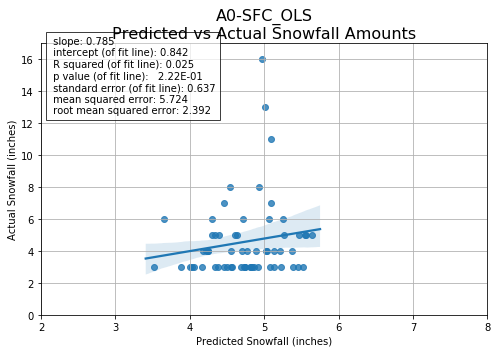

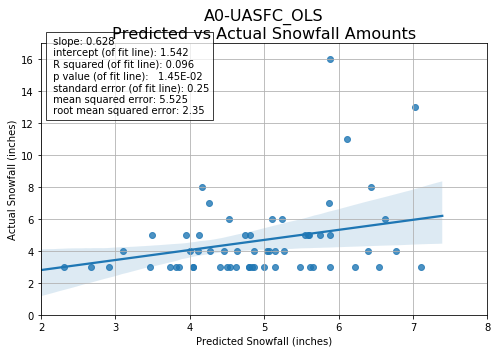

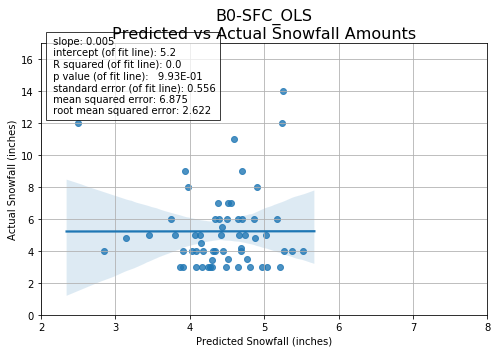

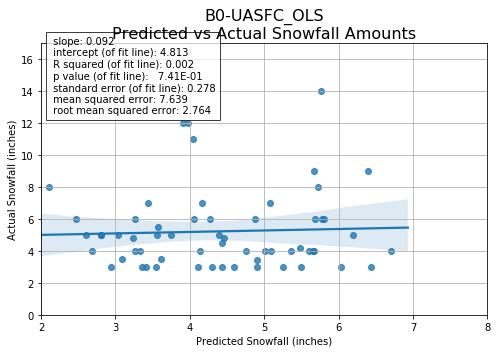

In [6]:
import regressors
print(descriptors)
for scenario in np.arange(0,len(model_data),1):
    print(descriptors[scenario])

for scenario in np.arange(0,len(model_data),1):
    actual_snf = model_data[scenario]['actual_snf']
    predicted_snf = model_data[scenario]['predicted_snf']
    
    
    fig = plt.figure(figsize=(8,5))
    sns.regplot(model_data[scenario]['predicted_snf'],model_data[scenario]['actual_snf'])
    
    
    bbox_props=dict(facecolor='red', alpha=0.75, fc = 'white')
    plt.annotate(' slope: ' + str(round(slopes[scenario],3)) +
                 '\n intercept (of fit line): ' + str(round(intercepts[scenario],3)) + 
                 '\n R squared (of fit line): ' + str(round(r_values[scenario]**2,3)) +  
                 '\n p value (of fit line): ' +  str(format(p_values[scenario], "10.2E")) + 
                 '\n standard error (of fit line): ' + str(round(std_errs[scenario],3)) +
                 '\n mean squared error: ' + str(round(mses[scenario],3)) +
                 '\n root mean squared error: ' + str(round(rmses[scenario],3)), \
                 xy=(0.02, 0.74), xycoords='axes fraction', fontsize=10, bbox = bbox_props)

    plt.xlabel('Predicted Snowfall (inches)')
    plt.ylabel('Actual Snowfall (inches)')
    plt.xlim([2,8])
    plt.ylim([0,17])
    plt.grid(True)
    
    plt.savefig('C:/Users/RAPP/Documents/Capstone/Report/figs/pred_vs_act_'+descriptors[scenario]+'.png',bbox_inches='tight')
    plt.title(descriptors[scenario]+'\nPredicted vs Actual Snowfall Amounts', fontsize = 16)




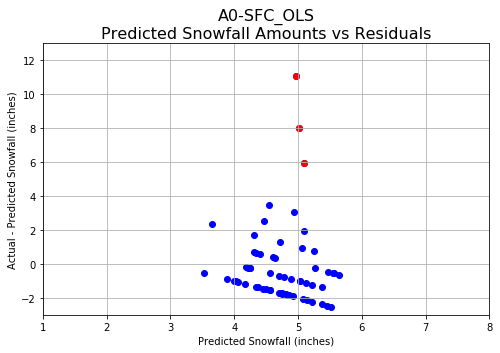

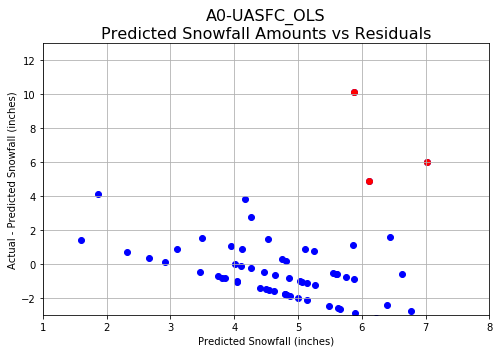

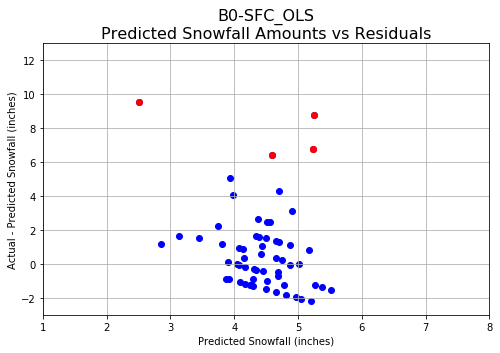

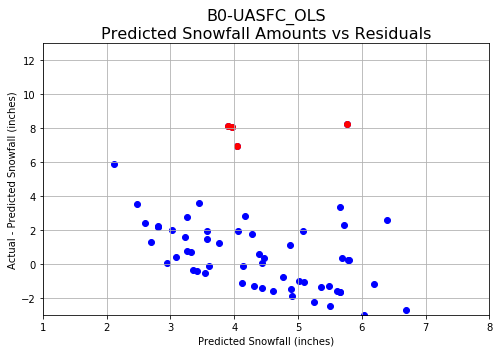

In [34]:
for scenario in np.arange(0, len(model_data), 1):
    
   actual_snf = model_data[scenario]['actual_snf']
   predicted_snf = model_data[scenario]['predicted_snf'] 
   actual_snf_gt10 = model_data[scenario]['actual_snf'][model_data[scenario]['actual_snf']>=10]
   predicted_snf_gt10 = model_data[scenario]['predicted_snf'][model_data[scenario]['actual_snf']>=10]
    
   fig = plt.figure(figsize=(8,5))
   
      
   
   plt.scatter(predicted_snf, actual_snf - predicted_snf, color ='b')
   plt.scatter(predicted_snf_gt10, actual_snf_gt10 - predicted_snf_gt10, color ='red')
   

   plt.ylabel('Actual - Predicted Snowfall (inches)')
   plt.xlabel('Predicted Snowfall (inches)')
   plt.xlim([1,8])
   plt.ylim([-3,13])
   plt.grid(True)
   plt.title('Predicted vs Actual Snowfall Amounts', fontsize = 16)
   plt.savefig('C:/Users/RAPP/Documents/Capstone/Report/figs/resid_vs_pred_'+descriptors[scenario]+'.png',bbox_inches='tight')
   plt.title(descriptors[scenario]+'\nPredicted Snowfall Amounts vs Residuals', fontsize = 16)
   

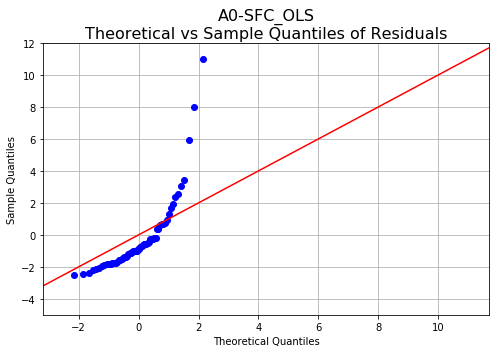

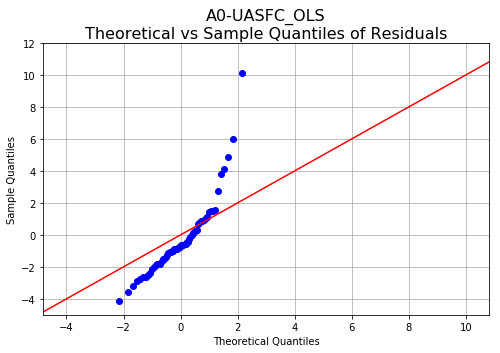

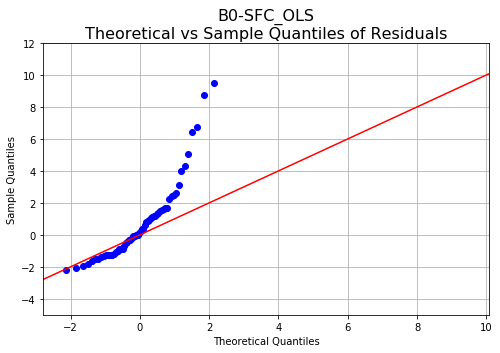

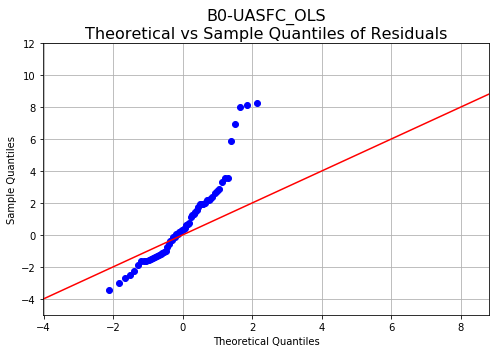

In [39]:
import statsmodels.api as sm
for scenario in np.arange(0, len(model_data), 1):
       actual_snf = model_data[scenario]['actual_snf']
       predicted_snf = model_data[scenario]['predicted_snf'] 


       residuals = actual_snf - predicted_snf
       fig, ax = plt.subplots(figsize=(8, 5))
       qq2=sm.qqplot(residuals, line='45', ax = ax)
       plt.ylim([-5,12])

       plt.grid(True)
       plt.grid(True)
       plt.savefig('C:/Users/RAPP/Documents/Capstone/Report/figs/qq_resid_'+descriptors[scenario]+'.png',bbox_inches='tight')
       plt.title(descriptors[scenario]+'\nTheoretical vs Sample Quantiles of Residuals', fontsize = 16)

    

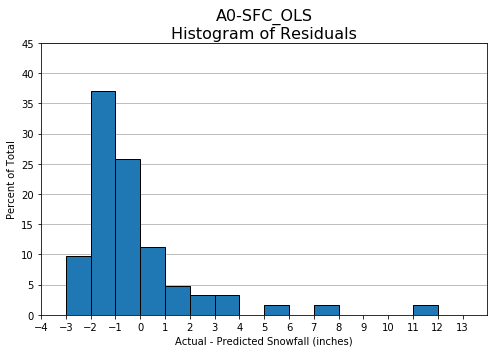

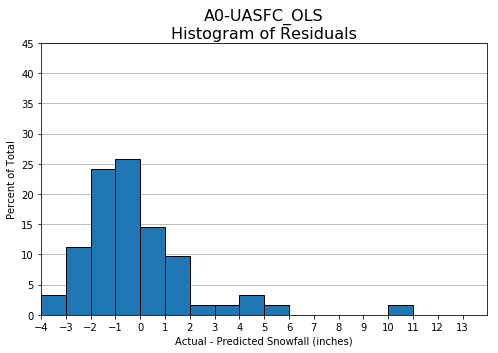

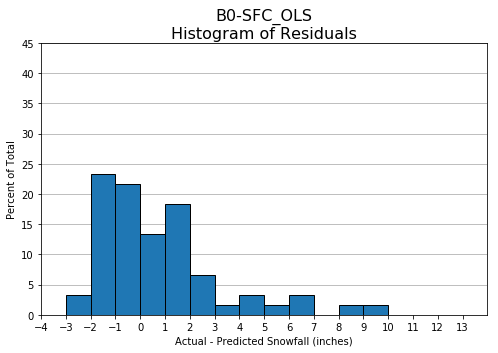

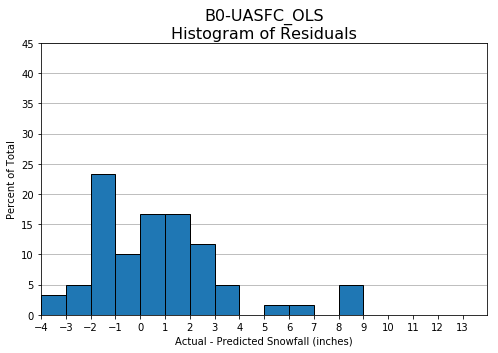

In [9]:
for scenario in np.arange(0, len(model_data), 1):
  actual_snf = model_data[scenario]['actual_snf']
  predicted_snf = model_data[scenario]['predicted_snf'] 

  diff =  actual_snf - predicted_snf
  
  fig = plt.figure(figsize=(8, 5))
  ax = plt.subplot(1,1,1)

  weights = np.ones_like(diff)/float(len(diff))
  plt.hist(diff, histtype = 'bar', weights=weights*100, \
           bins = np.arange(-4,14,1), align = 'mid', edgecolor = 'black') 

  plt.xlabel('Actual - Predicted Snowfall (inches)')
  plt.ylabel('Percent of Total')
  plt.xlim([-4,14])

  plt.xticks(np.arange(-4,14,1))
  plt.yticks(np.arange(0,46,5))
  ax.set_axisbelow(True)   #places gridlines behind bars
  plt.grid(True, axis = 'y')


  plt.title('', fontsize = 16)
  plt.savefig('C:/Users/RAPP/Documents/Capstone/Report/figs/hist_actual_minus_pred_'+descriptors[scenario]+'.png',bbox_inches='tight')
  plt.title(descriptors[scenario]+'\nHistogram of Residuals', fontsize = 16)

